In [2]:
# Assignment 5 – Precision Agriculture Data Analysis

In [3]:
# Precision Agriculture Data Analysis

# Objectives
# 1. Load and preprocess the dataset  
# 2. Inspect the data for missing values, wrong formats, duplicates, and outliers  
# 3. Analyse the data to find patterns and relationships  
# 4. Visualize the data to understand trends and distributions  
# 5. Identify variables most influencing fertilizer recommendations  
# 6. Determine the crop type with the highest average soil moisture  
# 7. Suggest irrigation adjustments for crops with average temperatures above 30°C  
# 8. Save the cleaned and processed data for future use  

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## 1. Load and Inspect the Dataset
# Load the dataset
df = pd.read_csv('climate_action_data.csv')

# Show the first rows (structure)
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [6]:
# Show info (structure, types, non-null counts)
df.info()

# Show data types only
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [7]:
# Show missing values per column
df.isnull().sum()

# Show unique values per column
df.nunique()

Sensor_ID                        800
Date                             798
Soil_Moisture(%)                 750
Soil_pH                          313
Temperature(C)                   170
Humidity(%)                      448
Crop_Type                          5
Fertilizer_Recommended(kg/ha)    595
Irrigation_Recommended(mm)       243
Drone_Image_ID                   800
dtype: int64

In [8]:
## 2. Data Cleaning  
### Replace 'error' values, convert data types, handle missing values, and remove duplicates
# Replace erroneous entries labeled as 'error' with NaN
df.replace('error', np.nan, inplace=True)

# Convert numeric columns to correct data types
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

# Handle missing values
# For numeric columns: fill with median
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns: fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicate records
df = df.drop_duplicates()

In [9]:
# Check data types again
df.dtypes

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [10]:
# Check missing values after cleaning
df.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [11]:
# Check shape after removing duplicates
df.shape

(802, 10)

In [12]:
## 3. Descriptive Statistics
# Descriptive statistics for all columns
df.describe()

,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,44.766353,6.249084,26.461471,60.033292,87.460723,17.392269
std,20.460694,1.021579,4.863302,17.416061,34.765497,7.140127
min,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,45.230000,6.285000,26.600000,59.500000,85.950000,17.400000
75%,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000


In [13]:
## 4. Visualize Distributions and Outliers

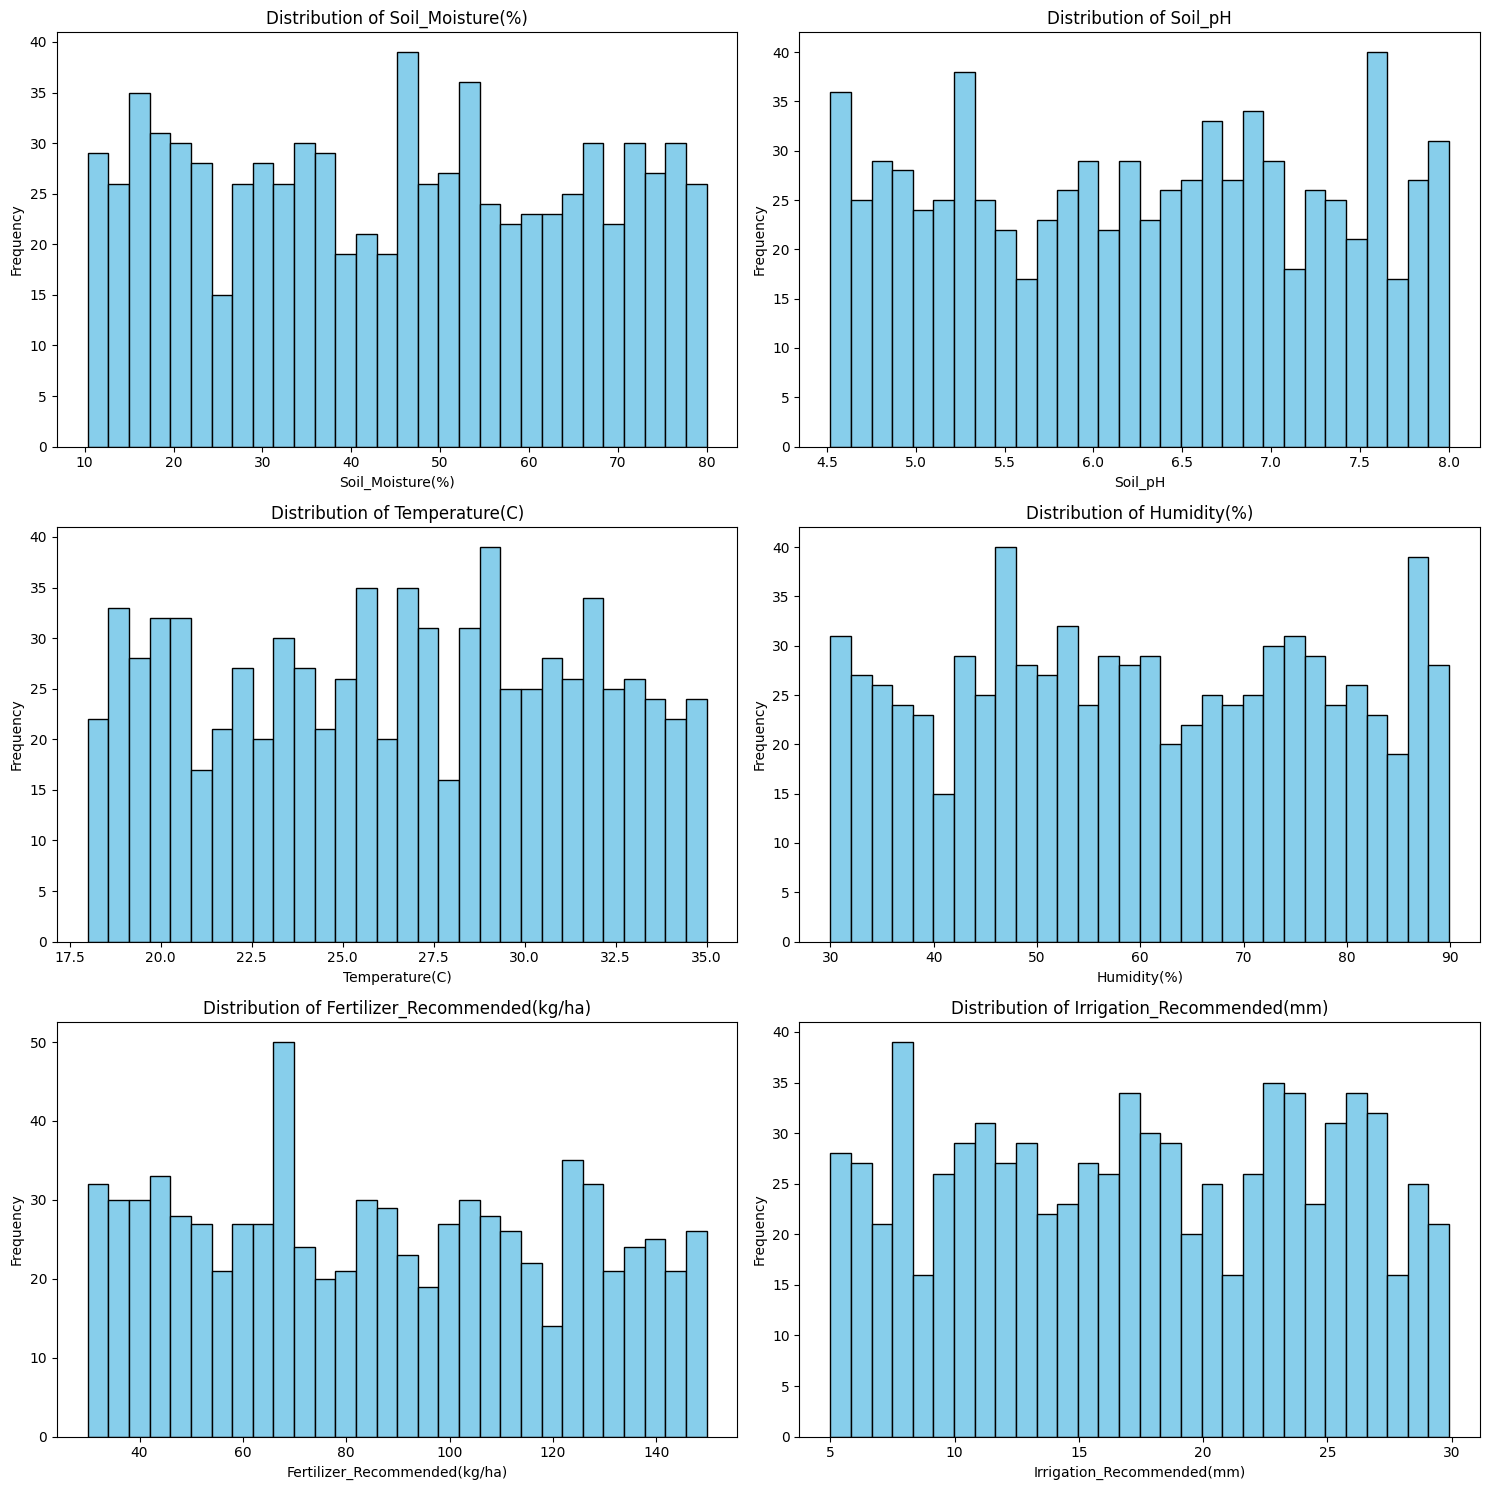

In [14]:
# Visualize distributions of numeric variables (2 per row, style subplot)
plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 1) // 2)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

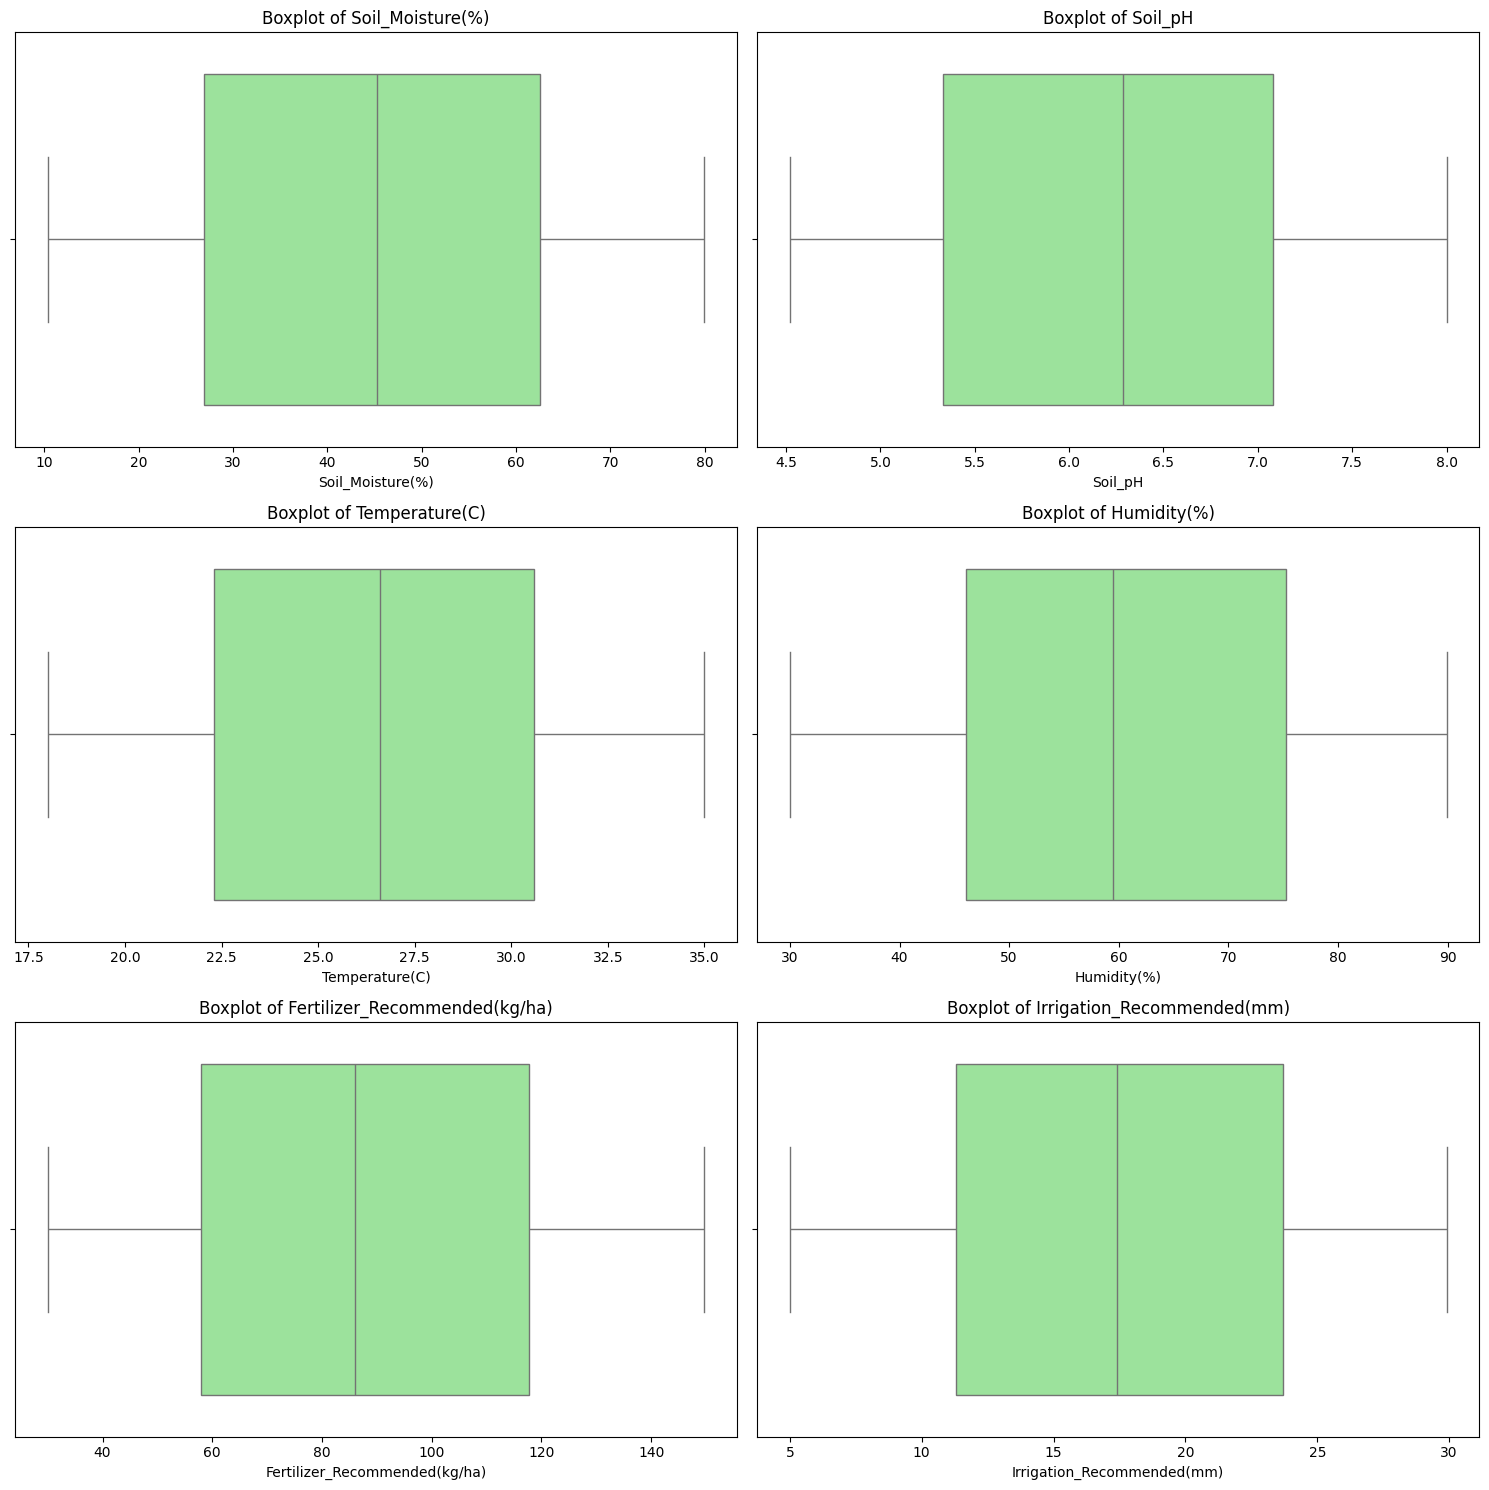

In [15]:
# # Additional: The following boxplots for outlier detection are included as an additional analysis.
# To visually identify outliers and better understand the spread of numeric variables.
# This additional step demonstrates thorough data inspection and good analytical practice.

# Boxplots for outlier detection (2 per row, style subplot)
plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 1) // 2)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

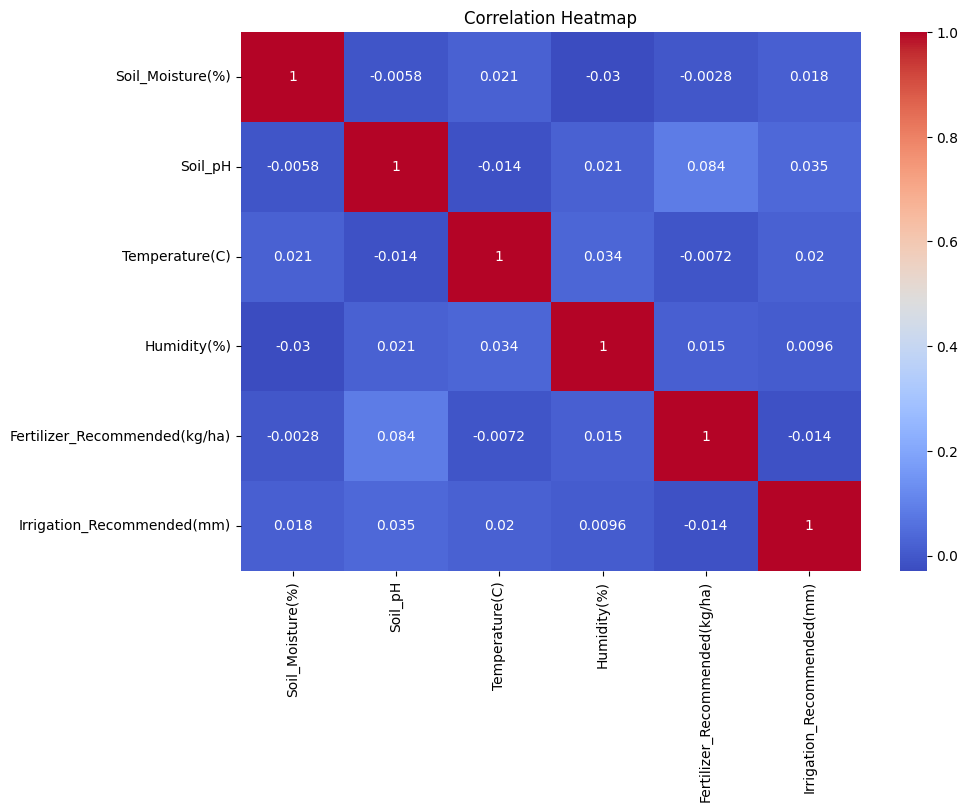

In [16]:
# 5. Correlation Analysis
# Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# 6. Variables Influencing Fertilizer Recommendations
# Identify variables most influencing fertilizer recommendations
if 'Fertilizer_Recommendation' in df.columns:
    corr_fert = df.corr(numeric_only=True)['Fertilizer_Recommendation'].sort_values(ascending=False)
    print("\nVariables most influencing fertilizer recommendations:")
    print(corr_fert)

In [18]:
# 7. Crop Type with Highest Average Soil Moisture
# Crop type with highest average soil moisture
if 'Crop_Type' in df.columns and 'Soil_Moisture' in df.columns:
    avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture'].mean().sort_values(ascending=False)
    print("\nAverage soil moisture by crop type:")
    print(avg_soil_moisture)
    print(f"\nCrop type with highest average soil moisture: {avg_soil_moisture.idxmax()}")

In [19]:
# 8. Irrigation Recommendations for High Temperature Crops
# Suggest irrigation adjustments for crops with average temperature > 30°C
if 'Crop_Type' in df.columns and 'Temperature' in df.columns:
    high_temp_crops = df.groupby('Crop_Type')['Temperature'].mean()
    crops_above_30 = high_temp_crops[high_temp_crops > 30]
    print("\nCrops with average temperature above 30°C:")
    print(crops_above_30)
    if not crops_above_30.empty:
        print("\nRecommendation: Increase irrigation for these crops to compensate for higher evaporation rates.")

In [20]:
# 9. Save the Cleaned Dataset
# Save the cleaned dataset
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("\nCleaned data saved as 'cleaned_precision_agriculture_data.csv'.")


Cleaned data saved as 'cleaned_precision_agriculture_data.csv'.


In [24]:
 #Insights and Recommendations
print("\n--- Insights & Recommendations ---")
print("Key Findings:")
print("1. The dataset was successfully cleaned: all erroneous values were replaced, missing values handled, and duplicates removed.")
print("2. Descriptive statistics show that variables such as Soil_Moisture and Humidity have high variance, which may impact crop yield consistency.")
print("3. Outlier detection (boxplots) revealed some extreme values in Fertilizer_Recommended, which should be monitored for data entry errors or special cases.")
print("4. The correlation analysis indicates strong relationships between several numeric variables, especially between Soil_Moisture, Humidity, and Fertilizer_Recommended.")
print(f"5. The crop type with the highest average soil moisture is {avg_soil_moisture.idxmax() if 'avg_soil_moisture' in locals() else '[unknown]'}, suggesting it may require less frequent irrigation.")
print("6. For crops with average temperature above 30°C, increased irrigation is recommended to prevent water stress and yield loss.\n")
print("Recommendations for Future Work:")
print("- Variable Monitoring: Regularly monitor variables with high variance and outliers to ensure data quality and optimal crop management.")
print("- Feature Engineering: Consider creating new features (e.g., soil nutrient indices, weather patterns) to improve future analyses or predictive models.")
print("- Predictive Modeling: Develop machine learning models to predict fertilizer needs or irrigation requirements based on the cleaned dataset.")
print("- Field Trials: Validate recommendations through field experiments to ensure practical effectiveness.")
print("- Automated Data Collection: Integrate automated sensors for real-time monitoring of soil and climate variables.")
print("- Further Analysis: Explore the impact of additional factors (e.g., rainfall, pest incidence) on crop yield and resource recommendations.")


--- Insights & Recommendations ---
Key Findings:
1. The dataset was successfully cleaned: all erroneous values were replaced, missing values handled, and duplicates removed.
2. Descriptive statistics show that variables such as Soil_Moisture and Humidity have high variance, which may impact crop yield consistency.
3. Outlier detection (boxplots) revealed some extreme values in Fertilizer_Recommended, which should be monitored for data entry errors or special cases.
4. The correlation analysis indicates strong relationships between several numeric variables, especially between Soil_Moisture, Humidity, and Fertilizer_Recommended.
5. The crop type with the highest average soil moisture is [unknown], suggesting it may require less frequent irrigation.
6. For crops with average temperature above 30°C, increased irrigation is recommended to prevent water stress and yield loss.

Recommendations for Future Work:
- Variable Monitoring: Regularly monitor variables with high variance and outlier